<a href="https://colab.research.google.com/github/ppbgarcia/Linear-regression-of-house-prices/blob/main/regressionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Problem - An exploratory data analysis

The main goal here is to explore and analyze the house pricing data, found on Google Colaboratory sample data, and maybe, MAYBE, find a correlation between the some variables available and the final price.


First of all, the minimal library imports:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import math

Let's import the dataset, stored as a CSV file.

In [ ]:
train=pd.read_csv('../content/sample_data/california_housing_train.csv')
train=pd.DataFrame(train)
print('Dataset imported and converted to a DataFrame!')

Dataset imported and converted to a DataFrame!


Now, let's take a look on the DataFrame using Pandas. Is very useful to know your dataset before working with it.



In [ ]:
print(train.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


More info on the variables can be found on https://developers.google.com/machine-learning/crash-course/california-housing-data-description


Then, let's just check the integrity of the dataset, look for any missing values.


In [ ]:
print(train.isnull().any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool


Data's looking good, no missing values. How the median income is distributed? How about we plot a histogram?


Text(0.5, 0, 'Median Income')

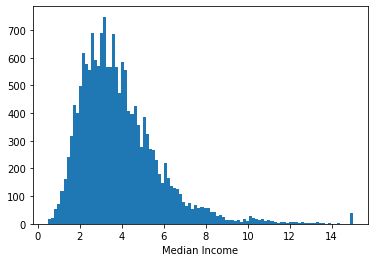

In [ ]:
plt.hist(train.median_income, bins = 100)
plt.xlabel('Median Income')

Looks like the median income is skewed towards $3000 per family. Looks too little, but remember that the data is from 1990!

But, most important, does this variables hold any correlation to the median house value?

In [ ]:
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


The closer to 1, the stronger the relationship. Not a very strong correlation, but the variable that has the most relationship with median house value is median income. We could try a simple linear regression to see how well we could fit and predict the median house value.

In [ ]:
Y=(train[['median_income']])
X=(train[['median_house_value']])
model = LinearRegression()
model.fit(X,Y)
Ypredict = model.predict(X)

A linear regression in Python is that simple. We stored in Ypredict our predictions for the given income. Now, let's plot the data that we have so we can see how the.

Text(0, 0.5, 'Median income in k dolars')

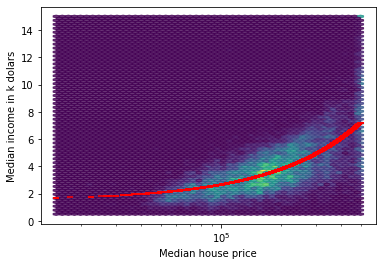

In [ ]:
plt.hexbin(X, Y, alpha = 0.8, gridsize = (50,50), xscale = 'log')
plt.xscale('log')
plt.scatter(X, Ypredict, c = 'red', marker = '_')
plt.xlabel('Median house price')
plt.ylabel('Median income in k dolars')

##comentário teste 1

The red line is our prediction. I know that I said that we were going to do a linear regression, and that red line doesn't look like a straight line. That happened because we scaled the X axis as log(X), because we are working with some variables in very different scales. While our median range was in 1k dolars to 15k, our house price was in millions! 

Back at our plot, behind the line, it's a heat map. Even tho there is a lot of outliers, the heatmap shows that the majority of the data and the line show that our prediction made is not that far off!

In another opportunity, we'll explore the magic world of the multivariable regression! Until next time!